<a href="https://colab.research.google.com/github/pwetherby/CancerAnalysis/blob/main/CancerRateAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import CSV files

In [2]:
income_death = pd.read_csv('income_death_data.csv')
income_incident = pd.read_csv('income_incident_data.csv')
incident_death = pd.read_csv('incident_death_data.csv')

## Import dataset

In [3]:
# income_death.head()

In [4]:
high_risk = income_death.sort_values('Age-Adjusted Death Rate',ascending=False).head()

In [5]:
high_risk = high_risk.drop('Median_Income',axis=1)
high_risk = high_risk.drop('Average Deaths per Year',axis=1)

## High Risk Counties for Cancer Deaths

In [6]:
high_risk

,County,Age-Adjusted Death Rate
910,"North Slope Borough, Alaska",124.9
1010,"Polk County, Tennessee",103.3
418,"Floyd County, Kentucky",98.7
832,"Mississippi County, Missouri",97.2
908,"Nome Census Area, Alaska",96.1


## Cancer Death and Incident Data


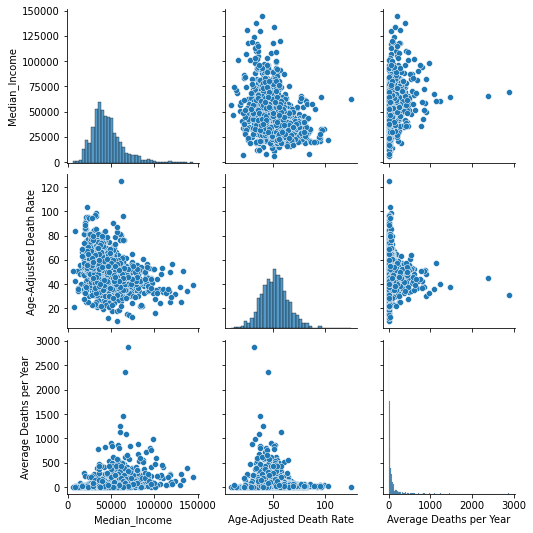

In [7]:
sns.pairplot(income_death);

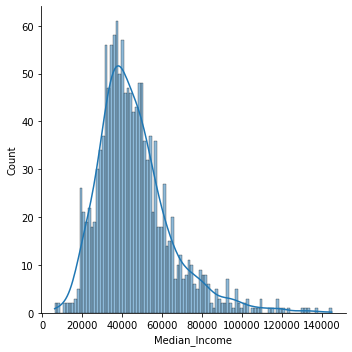

In [8]:
sns.displot(x='Median_Income',data=income_death,kde=True,bins=100);

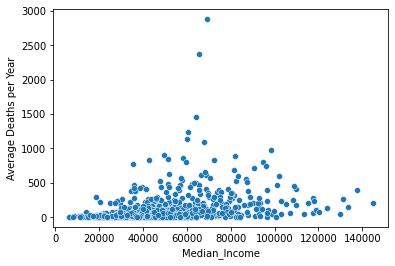

In [9]:
sns.scatterplot(x='Median_Income',y='Average Deaths per Year',data=income_death);

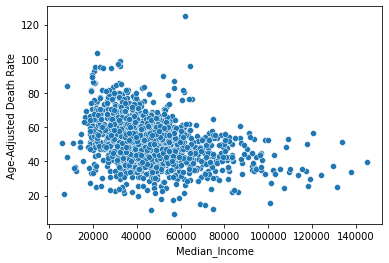

In [10]:
sns.scatterplot(x='Median_Income',y='Age-Adjusted Death Rate',data=income_death);

In [11]:
income_death.corr()

,Median_Income,Age-Adjusted Death Rate,Average Deaths per Year
Median_Income,1.000000,-0.354285,0.338089
Age-Adjusted Death Rate,-0.354285,1.000000,-0.145618
Average Deaths per Year,0.338089,-0.145618,1.000000


In [12]:
income_incident.head()

,County,Median_Income,Age-Adjusted Incidence Rate,Average Annual Count
0,"Abbeville County, South Carolina",43326.849462,68.1,24
1,"Acadia Parish, Louisiana",42345.339623,79.6,53
2,"Accomack County, Virginia",65267.573826,91.1,46
3,"Ada County, Idaho",45272.370370,52.2,191
4,"Adair County, Iowa",53179.632258,65.2,8


In [13]:
income_incident = income_incident.drop('County',axis=1)

In [14]:
incident_death.corr()                                                                                                                             

,Median_Income_x,Age-Adjusted Incidence Rate,Average Annual Count,Age-Adjusted Death Rate,Average Deaths per Year
Median_Income_x,1.000000,-0.309317,0.352895,-0.360187,0.342245
Age-Adjusted Incidence Rate,-0.309317,1.000000,-0.110913,0.891397,-0.111130
Average Annual Count,0.352895,-0.110913,1.000000,-0.164815,0.997886
Age-Adjusted Death Rate,-0.360187,0.891397,-0.164815,1.000000,-0.155333
Average Deaths per Year,0.342245,-0.111130,0.997886,-0.155333,1.000000


### COUNTY DATA

### Input County name as 'County, State' ex: King County, Washington

In [15]:
x = input("County name: ")
incident_death.loc[incident_death['County'] == x]


County name: King County, Washington


,County,Median_Income_x,Age-Adjusted Incidence Rate,Average Annual Count,Age-Adjusted Death Rate,Average Deaths per Year
580,"King County, Washington",81556.2,51.8,972,36.4,681


In [16]:
input = incident_death.loc[incident_death['County'] == x ]

In [17]:
input

,County,Median_Income_x,Age-Adjusted Incidence Rate,Average Annual Count,Age-Adjusted Death Rate,Average Deaths per Year
580,"King County, Washington",81556.2,51.8,972,36.4,681


In [18]:
incident_death = incident_death.drop('County',axis=1)

## Machine Learning Section

Define x and y

In [19]:
# Independent Variable x and Dependent Variable y

In [20]:
x=incident_death.drop(['Age-Adjusted Death Rate'],axis=1).values

In [21]:
y=incident_death['Age-Adjusted Death Rate'].values

In [22]:
print(x)

[[4.33268495e+04 6.81000000e+01 2.40000000e+01 2.00000000e+01]
 [4.23453396e+04 7.96000000e+01 5.30000000e+01 4.60000000e+01]
 [6.52675738e+04 9.11000000e+01 4.60000000e+01 3.80000000e+01]
 ...
 [3.67720000e+04 7.42000000e+01 2.00000000e+01 1.60000000e+01]
 [4.68880000e+04 6.81000000e+01 4.40000000e+01 3.50000000e+01]
 [3.74530000e+04 6.25000000e+01 8.00000000e+00 5.00000000e+00]]


In [23]:
print(y)

[57.6 68.6 76.7 ... 60.2 55.3 40.3]


Split the dataset in training set and test set

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=0)

Train the model on the training set

In [25]:
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

Predict the test set results

In [26]:
y_pred=ml.predict(x_test)
print(y_pred)

[ 68.19227745  53.93409299  58.56050527  42.38878319  49.75746138
  45.74910689  52.50345744  40.24044869  31.63198994  41.25917585
  53.68968375  15.45552833  55.40209373  59.41409794  56.02773877
  25.8486905   53.0404346   68.39538471  51.06023488  57.81462642
  48.9122289   41.76538508  55.09275777  46.20719789  55.81239092
  62.77746323  67.93647412  52.11510983  54.99325336  60.53250382
  66.97734296  45.25939593  54.90020247  46.95886531  42.64371003
  44.49800688  69.84302746  57.67910075  53.09624649  48.93296823
  63.02205841  47.35468434  67.86479889  36.28686469  73.8822122
  61.2450589   48.41486181  52.62094189  62.40867483  62.01548981
  37.03183579  50.44053147  57.2217063   67.74555274  47.14680159
  56.40760763  14.07841588  63.09691296  61.06393625  41.08704214
  62.92072026  77.05643593  52.43382255  55.00252274  66.40468385
  42.67393479  35.95240356  52.57396926  70.13756194  64.11001669
  49.07057862  60.84906692  25.35642691  44.86999338  44.38905978
  75.233367

Predict Using Values from incident_death

In [27]:
input = input.drop(['County'],axis=1)

In [28]:
input

,Median_Income_x,Age-Adjusted Incidence Rate,Average Annual Count,Age-Adjusted Death Rate,Average Deaths per Year
580,81556.2,51.8,972,36.4,681


In [29]:
val = input.drop(['Age-Adjusted Death Rate'],axis=1).values

In [30]:
 ml.predict(val)

array([31.97135143])

Evaluate the model

In [31]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8245352983243797

Plot the results

Text(0.5, 1.0, 'Actual vs, Predicted')

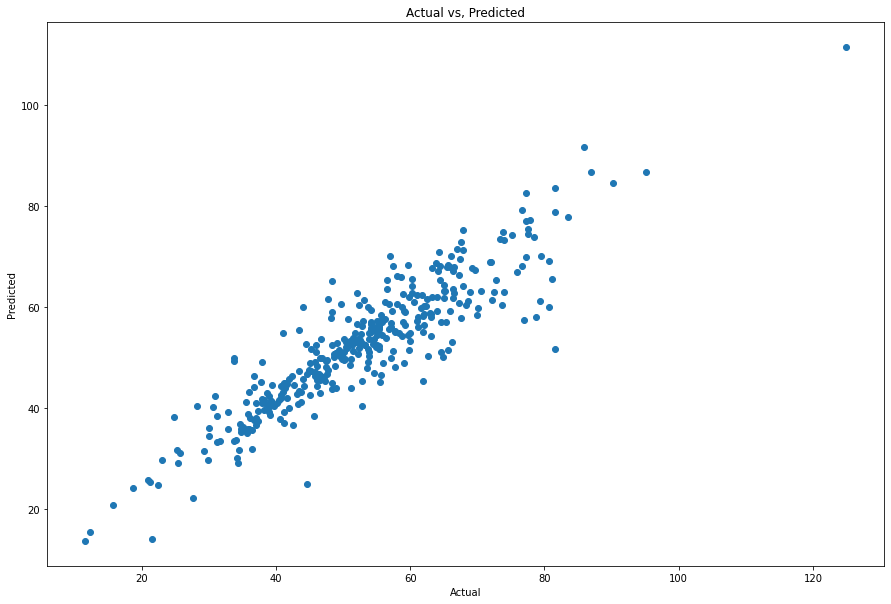

In [32]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs, Predicted')

In [33]:
pred_y_df = pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference': y_test-y_pred})
pred_y_df[0:5]

,Actual Value,Predicted Value,Difference
0,64.5,68.192277,-3.692277
1,51.5,53.934093,-2.434093
2,63.1,58.560505,4.539495
3,39.0,42.388783,-3.388783
4,50.3,49.757461,0.542539


## Prediction Data for County